In [1]:
"""
This script provides an example of building a neural
network for classifying glass identification dataset on
http://archive.ics.uci.edu/ml/datasets/Glass+Identification
It loads data using a data loader, and trains a neural
network with batch training.
"""

# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data
from torch.autograd import Variable

# Hyper Parameters
input_size = 10
hidden_size = 50
num_classes = 7
num_epochs = 500
batch_size = 10
learning_rate = 0.01


# define a function to plot confusion matrix
def plot_confusion(input_sample, num_classes, des_output, actual_output):
    confusion = torch.zeros(num_classes, num_classes)
    for i in range(input_sample):
        actual_class = actual_output[i]
        predicted_class = des_output[i]

        confusion[actual_class][predicted_class] += 1

    return confusion



In [6]:
"""
Step 1: Load data and pre-process data
Here we use data loader to read data
"""


# define a customise torch dataset
class DataFrameDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.data_tensor = torch.Tensor(df.as_matrix())

    # a function to get items by index
    def __getitem__(self, index):
        obj = self.data_tensor[index]
        input = self.data_tensor[index][0:-1]
        target = self.data_tensor[index][-1] - 1

        return input, target

    # a function to count samples
    def __len__(self):
        n, _ = self.data_tensor.shape
        return n

# load all data
data = pd.read_csv('./glass.csv', header=None)

# normalise input data
for column in data:
    # the last column is target
    if column != data.shape[1] - 1:
        data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())

# randomly split data into training set (80%) and testing set (20%)
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

# define train dataset and a data loader
train_dataset = DataFrameDataset(df=train_data)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Epoch [1/500], Loss: 26.5386, Accuracy: 34.71 %
Epoch [51/500], Loss: 0.5055, Accuracy: 100.00 %
Epoch [101/500], Loss: 0.1224, Accuracy: 100.00 %
Epoch [151/500], Loss: 0.0481, Accuracy: 100.00 %
Epoch [201/500], Loss: 0.0230, Accuracy: 100.00 %
Epoch [251/500], Loss: 0.0130, Accuracy: 100.00 %
Epoch [301/500], Loss: 0.0070, Accuracy: 100.00 %
Epoch [351/500], Loss: 0.0041, Accuracy: 100.00 %
Epoch [401/500], Loss: 0.0024, Accuracy: 100.00 %
Epoch [451/500], Loss: 0.0015, Accuracy: 100.00 %


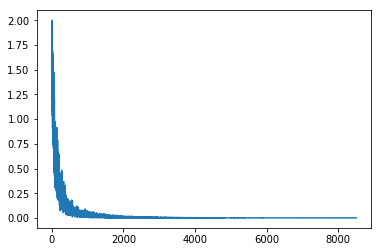

In [ ]:
"""
Step 2: Define a neural network 

Here we build a neural network with one hidden layer.
    input layer: 9 neurons, representing the features of Glass
    hidden layer: 50 neurons, using Sigmoid as activation function
    output layer: 7 neurons, representing the type of glass
"""

# TODO

# Neural Network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()


    def forward(self, x):

        return out


net = Net(input_size, hidden_size, num_classes)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# store all losses for visualisation
all_losses = []

# train the model by batch
for epoch in range(num_epochs):
    total = 0
    correct = 0
    total_loss = 0
    for step, (batch_x, batch_y) in enumerate(train_loader):
        # convert torch tensor to Variable
        X = Variable(batch_x)
        Y = Variable(batch_y.long())

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(X)
        loss = criterion(outputs, Y)
        all_losses.append(loss.data)
        loss.backward()
        optimizer.step()

        if (epoch % 50 == 0):
            _, predicted = torch.max(outputs, 1)
            # calculate and print accuracy
            total = total + predicted.size(0)
            correct = correct + sum(predicted.data.numpy() == Y.data.numpy())
            total_loss = total_loss + loss
    if (epoch % 50 == 0):
        print('Epoch [%d/%d], Loss: %.4f, Accuracy: %.2f %%'
              % (epoch + 1, num_epochs,
                 total_loss, 100 * correct/total))

# Optional: plotting historical loss from ``all_losses`` during network learning
# Please uncomment me from next line to ``plt.show()`` if you want to plot loss

import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)
plt.show()

In [8]:
"""
Evaluating the Results

To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every glass (rows)
which class the network guesses (columns).

"""

train_input = train_data.iloc[:, :input_size]
train_target = train_data.iloc[:, input_size]

inputs = Variable(torch.Tensor(train_input.as_matrix()).float())
targets = Variable(torch.Tensor(train_target.as_matrix() - 1).long())

outputs = net(inputs)
_, predicted = torch.max(outputs, 1)

print('Confusion matrix for training:')
print(plot_confusion(train_input.shape[0], num_classes, predicted.long().data, targets.data))

"""
Step 3: Test the neural network

Pass testing data to the built neural network and get its performance
"""
# get testing data
test_input = test_data.iloc[:, :input_size]
test_target = test_data.iloc[:, input_size]

inputs = Variable(torch.Tensor(test_input.as_matrix()).float())
targets = Variable(torch.Tensor(test_target.as_matrix() - 1).long())

outputs = net(inputs)
_, predicted = torch.max(outputs, 1)

total = predicted.size(0)
correct = predicted.data.numpy() == targets.data.numpy()

print('Testing Accuracy: %.2f %%' % (100 * sum(correct)/total))



Confusion matrix for training:
tensor([[56.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 63.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 13.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  6.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 22.]])
Testing Accuracy: 95.45 %


/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuchiliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [9]:
"""
Evaluating the Results

To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every glass (rows)
which class the network guesses (columns).

"""

print('Confusion matrix for testing:')
print(plot_confusion(test_input.shape[0], num_classes, predicted.long().data, targets.data))


Confusion matrix for testing:
tensor([[14.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 13.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  2.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  3.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  3.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  7.]])
